<a href="https://colab.research.google.com/github/duc-ke/study-book-keras_3mins_deeplearning/blob/master/7_CNN(LeNet)_cifar10_model%EB%B0%A9%EC%8B%9D_%ED%81%B4%EB%9E%98%EC%8A%A4%ED%98%95_with%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/duc-ke/study_3mins_deeplearning.git
%run study_3mins_deeplearning/0_custom_libraries.ipynb

Cloning into 'study_3mins_deeplearning'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 28 (delta 12), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (28/28), done.


In [0]:
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, Input
from keras.models import Model
from keras import datasets
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
class CNN(Model):
  def __init__(self, input_shape, num_of_classes):
    self.num_of_classes = num_of_classes
    self.in_shape = input_shape
    self.build_model()
    self.compiler()
  
  def build_model(self):
    in_shape = self.in_shape
    print('!!!!!', in_shape)
    num_of_classes = model.num_of_classes

    x = Input(shape=in_shape)
    h = Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=in_shape)(x)
    h = Conv2D(64, kernel_size=(3, 3), activation='relu')(h)
    h = MaxPool2D(pool_size=(2, 2))(h)
    h = Dropout(0.25)(h)

    h = Flatten()(h)

    h = Dense(128, activation='relu')(h)
    h = Dropout(0.5)(h)
    y = Dense(num_of_classes, activation='softmax')(h)

    super().__init__(x, y)
    # self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  def compiler(self):
    self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
from sklearn import preprocessing    # MinMax Scaler
from sklearn import model_selection    # x, y데이터를 split
from sklearn import metrics    # confusion matrix출력

In [0]:
class Data():
  def __init__(self, x_train, y_train, num_of_classes, scaling=True):
    self.x = x_train
    self.y = y_train
    self.add_channels()
    x_train = self.x
    

    print(x_train.shape)
    x_train = x_train.astype('float32')

    x_train, x_val, y_train, y_val = model_selection.train_test_split(x_train, y_train, test_size=0.2,
                                                                      random_state=42)

    n, r, c, channels = x_train.shape
    n2, r2, c2, channels2 = x_val.shape

    if scaling:
      scaler = preprocessing.MinMaxScaler()
      x_train = scaler.fit_transform(x_train.reshape(n, -1)).reshape(x_train.shape)    # MinMaxScaler는 1차원 벡터가 input 
      x_val = scaler.transform(x_val.reshape(n2, -1)).reshape(x_val.shape)
    
    print('original x_train shape:', x_train.shape)
    print('x_train size:', x_train.shape[0])
    print('x_test size:', x_test.shape[0])
    
    y_train = np_utils.to_categorical(y_train, num_of_classes)
    y_val = np_utils.to_categorical(y_val, num_of_classes)

    self.x_train, self.y_train = x_train, y_train
    self.x_val, self.y_val = x_val, y_val


  def add_channels(self):
    x = self.x

    if len(x) == 3:    # 흑백일 경우
      n, r, c = x.shape 
      x = x.reshape(n, r, c, 1)
      input_shape = (r, c, 1)
    else:
      input_shape = x.shape[1:]
    self.input_shape = input_shape
    self.x = x


    

In [0]:
import numpy as np

In [0]:
# data 저장하기 위한 함수
import datetime
import uuid
import os


def unique_filename(type='uuid'):
    if type == 'datetime':
        filename = datetime.datetime.now().strftime("%y%m%d_%H%M%S")
    else:  # type == "uuid"
        filename = str(uuid.uuid4())
    return filename


def makenewfold(prefix='output_', type='datetime'):
    suffix = unique_filename('datetime')
    foldname = 'output_' + suffix
    os.makedirs(foldname)
    return foldname

In [0]:
class Machine():
  def __init__(self, x, y, num_of_classes):
    num_of_classes = 10
    x_train = x
    y_train = y
    self.num_of_classes = num_of_classes
    self.set_data(x_train, y_train)
    self.set_model()
  
  def set_data(self, x, y):
    num_of_classes = self.num_of_classes
    data = Data(x, y, num_of_classes)
    self.data = data

  def set_model(self):
    data = self.data 
    input_shape = data.input_shape
    print('Machine의 input shape', input_shape)
    num_of_classes = self.num_of_classes
    model = CNN(input_shape, num_of_classes)
    self.model = model
  
  def fit(self, epochs=100, batch_size=100):
    x_train = self.data.x_train
    y_train = self.data.y_train
    model = self.model

    x_val = self.data.x_val
    y_val = self.data.y_val
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1,
             validation_data=(x_val, y_val))
    self.history = history
  
  def model_result(self, fig=True, batch_size=100):
    model = self.model
    x_val = self.data.x_val
    y_val = self.data.y_val
    history = self.history
    
    ##### evaluate & fig
    print('Confusion matrix')
    y_pred = model.predict(x_val)
    y_pred_class = np.argmax(y_pred, axis=1)    # softmax확률값을 y class로 롤백
    # print(metrics.confusion_matrix(y ))
    y_true_class = np.argmax(y_val, axis=1)
    print('y_pred:{}'.format(y_pred))
    print('y_predicted_class:{}, y_true_class:{}'.format(y_pred_class, y_true_class))
    print(metrics.confusion_matrix(y_pred_class, y_true_class))

    evaluation = model.evaluate(x_val, y_val, batch_size=batch_size)
    print('evaluation(Cost, Accuracy): {}'.format(evaluation))

    # 결과저장
    suffix = unique_filename('datetime')
    dir_name = 'output_' + suffix
    os.mkdir(dir_name)

     # history 저장
    f_history = 'history.npy'
    np.save(os.path.join(dir_name, f_history), history.history)
    
     # 가중치 저장
    model.save_weights(os.path.join(dir_name, 'dl_model.h5'))    
    print('Output dir name:', dir_name)
    
    if fig:
      plt.figure(figsize=(12, 4))
      plt.subplot(1, 2, 1)
      plot_acc(history)
      plt.subplot(1, 2, 2)
      plot_loss(history)
      plt.show()

In [0]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
model = Machine(x_train, y_train, 10)

(50000, 32, 32, 3)
original x_train shape: (40000, 32, 32, 3)
x_train size: 40000
x_test size: 10000
Machine의 input shape (32, 32, 3)
!!!!! (32, 32, 3)


In [0]:
model.fit(epochs=10)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 6s 142us/step - loss: 1.6280 - acc: 0.4093 - val_loss: 1.2998 - val_acc: 0.5403
Epoch 2/10
40000/40000 [==============================] - 5s 118us/step - loss: 1.2810 - acc: 0.5456 - val_loss: 1.0953 - val_acc: 0.6165
Epoch 3/10
40000/40000 [==============================] - 5s 118us/step - loss: 1.1403 - acc: 0.5963 - val_loss: 0.9838 - val_acc: 0.6558
Epoch 4/10
40000/40000 [==============================] - 5s 118us/step - loss: 1.0529 - acc: 0.6283 - val_loss: 0.9469 - val_acc: 0.6662
Epoch 5/10
40000/40000 [==============================] - 5s 119us/step - loss: 0.9850 - acc: 0.6505 - val_loss: 0.9316 - val_acc: 0.6758
Epoch 6/10
40000/40000 [==============================] - 5s 119us/step - loss: 0.9260 - acc: 0.6697 - val_loss: 0.9290 - val_acc: 0.6767
Epoch 7/10
40000/40000 [==============================] - 5s 119us/step - loss: 0.8768 - acc: 0.6891 - val_loss: 0.8978 - 

Confusion matrix
y_pred:[[5.27015945e-04 1.15463954e-04 1.09843328e-03 ... 2.36961357e-02
  4.98696281e-05 9.12512243e-02]
 [6.50736829e-03 2.17021625e-05 2.10315979e-04 ... 1.48899449e-06
  9.91796374e-01 1.38040504e-03]
 [2.91589051e-01 1.69910863e-03 3.11783236e-02 ... 2.24141753e-03
  6.31506205e-01 5.98897040e-03]
 ...
 [6.13301210e-02 1.95705160e-01 6.62144012e-05 ... 1.82172457e-07
  7.00177789e-01 4.26759161e-02]
 [5.74430169e-06 4.70814626e-07 2.62594037e-02 ... 1.30857190e-03
  1.95649150e-07 3.05505843e-08]
 [4.28210078e-05 2.05440097e-04 3.44586298e-02 ... 5.16996988e-05
  1.38029191e-05 1.82761232e-06]]
y_predicted_class:[5 8 8 ... 8 4 6], y_true_class:[7 8 0 ... 8 2 6]
[[638  20  60  16  17   3   4  12  56  16]
 [ 35 811   5   4   6   5  13   4  43 105]
 [ 71  10 666 107 117 104  72  69  19  13]
 [ 29  12  56 527  58 185  61  45  13  16]
 [ 23   7  67  54 586  39  54  55   3   2]
 [ 12   5  67 202  19 585  22  47   6   3]
 [  5   4  45  58  39  23 758   4   3   6]
 [ 13  

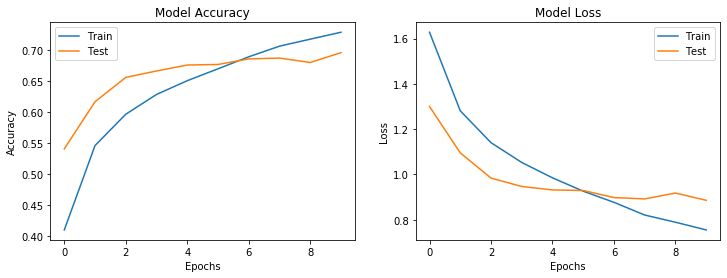

In [0]:
model.model_result()